In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [4]:
df['country']=lbl.fit_transform(df['country'])
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.shape

(167, 10)

In [7]:
model=KMeans(n_clusters=3)

In [10]:
model.get_params

<bound method BaseEstimator.get_params of KMeans(n_clusters=3)>

In [44]:
clusters=model.labels_

In [45]:
len(set(model.labels_))

3

In [46]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
df=pd.DataFrame(scalar.fit_transform(df))
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [47]:
model.fit(df)

KMeans(n_clusters=3)

In [48]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_reduced=pd.DataFrame(pca.fit_transform(df),columns=['PCA1','PCA2'])

In [49]:
df_reduced

,PCA1,PCA2
0,-2.958742,-0.069228
1,0.382716,-0.764844
2,-0.330796,-0.608983
3,-2.975090,1.548361
4,0.988175,-0.040027
...,...,...
162,-0.775815,0.791185
163,-0.503341,-1.000980
164,0.545452,1.554582
165,-1.839362,0.088454


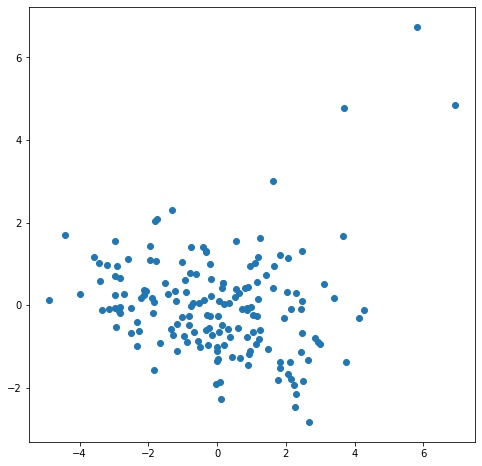

In [50]:
plt.figure(figsize=(8,8))
plt.scatter(df_reduced['PCA1'],df_reduced['PCA2'])


In [51]:
model.cluster_centers_

array([[-0.02782069, -0.41035291, -0.01905868, -0.22975892,  0.02583178,
        -0.23414538, -0.01734704,  0.25896065, -0.42549251, -0.34533068],
       [-0.03398402,  1.36021776, -0.43753313, -0.15598401, -0.18920377,
        -0.68689408,  0.40211078, -1.28217981,  1.36494385, -0.60424243],
       [ 0.11320022, -0.83000679,  0.63382985,  0.7674502 ,  0.19133932,
         1.49103941, -0.49784881,  1.09287988, -0.79958564,  1.65007148]])

In [52]:
reduced_centres=pca.transform(model.cluster_centers_)

In [53]:
reduced_centres

array([[ 0.1918167 , -0.13527333],
       [-2.43437228,  0.41492597],
       [ 2.80317364, -0.22866535]])

In [56]:
df_reduced['clusters']=clusters
df_reduced.head()

,PCA1,PCA2,clusters
0,-2.958742,-0.069228,1
1,0.382716,-0.764844,2
2,-0.330796,-0.608983,2
3,-2.975090,1.548361,1
4,0.988175,-0.040027,2


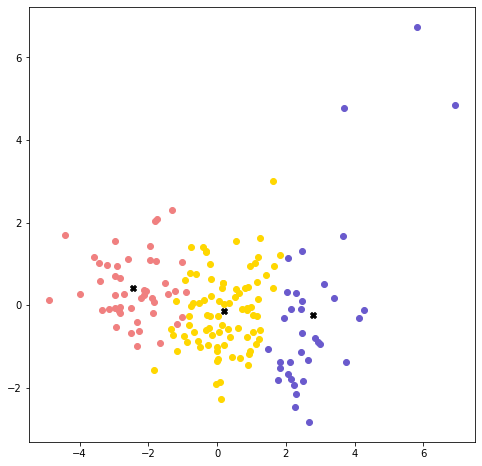

In [74]:
plt.figure(figsize=(8,8))


plt.scatter(df_reduced[df_reduced['clusters']==0].loc[:,'PCA1'],df_reduced[df_reduced['clusters']==0].loc[:,'PCA2'],color='slateblue')
plt.scatter(df_reduced[df_reduced['clusters']==1].loc[:,'PCA1'],df_reduced[df_reduced['clusters']==1].loc[:,'PCA2'],color='lightcoral')
plt.scatter(df_reduced[df_reduced['clusters']==2].loc[:,'PCA1'],df_reduced[df_reduced['clusters']==2].loc[:,'PCA2'],color='gold')
plt.scatter(reduced_centres[:,0],reduced_centres[:,1],marker='X',color='black')